In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

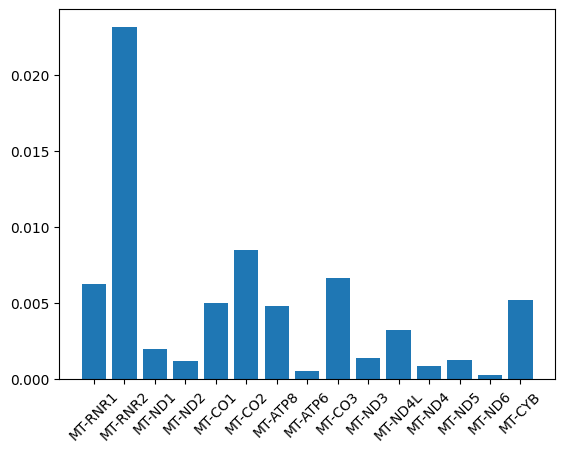

4316.758


In [2]:
dataFile = pd.read_csv(
    '../Gene Data/Donor1_CD4_Genes.csv', 
    usecols = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'non-MT'
    ]
).astype('float32')

data = dataFile.to_numpy()
aveSize = np.average(data.transpose()[15])
for i in range(len(data)):
    data[i] = data[i] / data[i][15]
name = dataFile.columns.values[:15]

ave1 = [np.average(d) for d in data.transpose()]
plt.bar(name, ave1[:15])
plt.xticks(rotation = 45)
plt.show()
print(aveSize)

In [3]:
coef = 1 / np.array(ave1)
for i in range(2, 15):
    if i == 13:
        continue
    coef[i] = coef[i] * 0.9
coef /= 2 / np.average(np.log(2) / coef[2:15] / 60)

for i in range(15):
    print('%s & %6f & %6f \\\\' % (name[i], coef[i], np.log(2) / coef[i] / 60))

MT-RNR1 & 0.003227 & 3.579696 \\
MT-RNR2 & 0.000870 & 13.272049 \\
MT-ND1 & 0.009268 & 1.246539 \\
MT-ND2 & 0.015645 & 0.738430 \\
MT-CO1 & 0.003640 & 3.173496 \\
MT-CO2 & 0.002137 & 5.406789 \\
MT-ATP8 & 0.003767 & 3.067105 \\
MT-ATP6 & 0.034096 & 0.338823 \\
MT-CO3 & 0.002719 & 4.248379 \\
MT-ND3 & 0.012971 & 0.890630 \\
MT-ND4L & 0.005564 & 2.076371 \\
MT-ND4 & 0.021766 & 0.530763 \\
MT-ND5 & 0.014269 & 0.809600 \\
MT-ND6 & 0.077088 & 0.149860 \\
MT-CYB & 0.003476 & 3.323214 \\


In [4]:
def get_iqr_data(data, p):
    q1 = np.percentile(data, 25, axis = 1)
    q3 = np.percentile(data, 75, axis = 1)
    iqr = q3 - q1
    down = q1 - p * iqr
    up = q3 + p * iqr

    print(up)
    print(down)
    output = []
    for d in data.transpose():
        if (list(down) <= list(d)) and (list(up) >= list(d)) and (list(d) > list(np.zeros(15))):
            output.append(d)
    return(np.array(output))

In [5]:
def process_data(data): 
    output = []
    for d in data.transpose():
        flag = True
        for i in range(15):
            if d[i] == 0:
                flag = False
                continue
        if flag:
            output.append(d)
    return(np.array(output))

data1 = process_data(data.transpose()[:15])
ave01 = [np.average(d) for d in data1.transpose()]
data1.transpose().shape

(15, 1225)

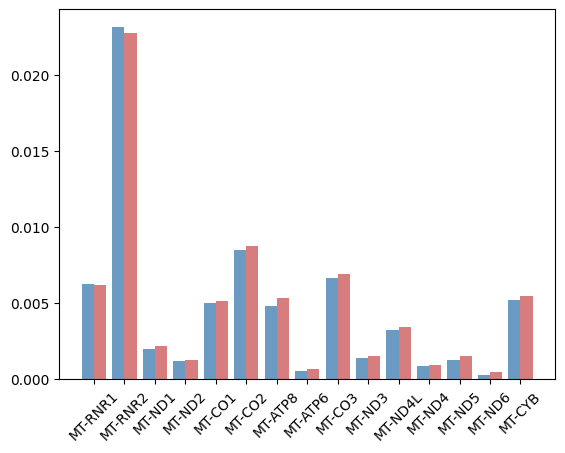

In [6]:
data_ = ave1[:15]
ref_data = ave01[:15]

fig = plt.figure()
bar_width = 0.4

ax = fig.add_subplot(111)
ax.bar(x = np.arange(len(name)), width = bar_width, height = data_, label='y1', fc = 'steelblue', alpha = 0.8)
ax.bar(x = np.arange(len(name)) + bar_width, width = bar_width, height = ref_data, label='y1', fc = 'indianred', alpha = 0.8)

plt.xticks(np.arange(len(name)) + bar_width / 2, name) 
ax.tick_params(axis = 'x', labelrotation = 45)

plt.show()

In [7]:
get_iqr_data(data.transpose()[:15], 1.5).shape

[0.01173543 0.04442511 0.00419274 0.00278701 0.00993833 0.01503894
 0.00973241 0.00150463 0.01216068 0.0030805  0.00640062 0.00218338
 0.00302148 0.00094062 0.0098897 ]
[-4.63086320e-03 -1.35050926e-02 -7.17388612e-04 -7.91110222e-04
 -1.21687065e-03 -2.40419176e-05 -1.12577347e-03 -5.62187512e-04
 -2.33656727e-04 -6.15000237e-04 -6.53120514e-04 -7.27280898e-04
 -7.59116665e-04 -5.64374004e-04 -4.53115150e-04]


(2549, 15)

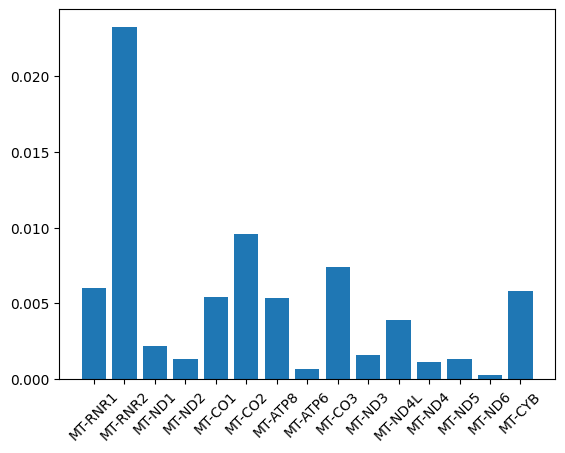

5178.618


In [8]:
dataFile = pd.read_csv(
    '../Gene Data/Donor1_CD8_Genes.csv', 
    usecols = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'non-MT'
    ]
).astype('float32')

data = dataFile.to_numpy()
aveSize = np.average(data.transpose()[15])
for i in range(len(data)):
    data[i] = data[i] / data[i][15]
name = dataFile.columns.values[:15]

ave2 = [np.average(d) for d in data.transpose()]
plt.bar(name, ave2[:15])
plt.xticks(rotation = 45)
plt.show()
print(aveSize)

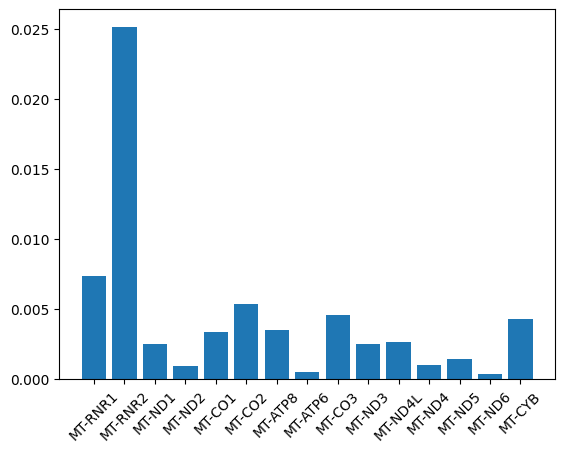

5397.6104


In [9]:
dataFile = pd.read_csv(
    '../Gene Data/Donor2_CD4_Genes.csv', 
    usecols = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'non-MT'
    ]
).astype('float32')

data = dataFile.to_numpy()
aveSize = np.average(data.transpose()[15])
for i in range(len(data)):
    data[i] = data[i] / data[i][15]
name = dataFile.columns.values[:15]

ave3 = [np.average(d) for d in data.transpose()]
plt.bar(name, ave3[:15])
plt.xticks(rotation = 45)
plt.show()
print(aveSize)

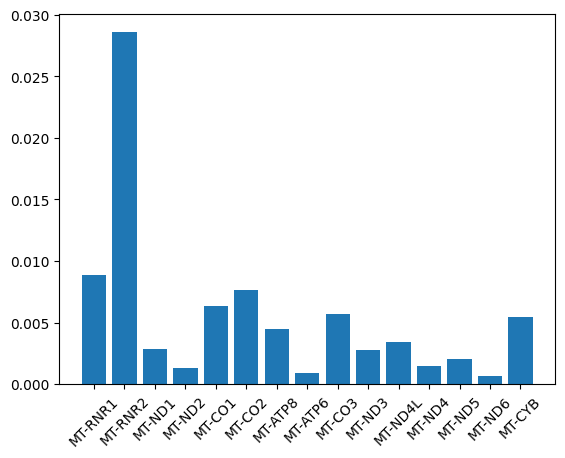

5137.1846


In [10]:
dataFile = pd.read_csv(
    '../Gene Data/Donor2_CD8_Genes.csv', 
    usecols = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'non-MT'
    ]
).astype('float32')

data = dataFile.to_numpy()
aveSize = np.average(data.transpose()[15])
for i in range(len(data)):
    data[i] = data[i] / data[i][15]
name = dataFile.columns.values[:15]

ave4 = [np.average(d) for d in data.transpose()]
plt.bar(name, ave4[:15])
plt.xticks(rotation = 45)
plt.show()
print(aveSize)

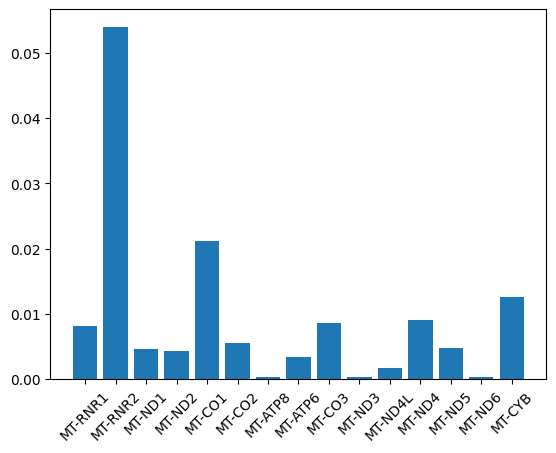

291331.25


In [11]:
dataFile = pd.read_csv(
    '../Gene Data/smartseq_mitogenes.csv', 
    usecols = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'Non-MT'
    ]
).astype('float32')

data = dataFile.to_numpy()
aveSize = np.average(data.transpose()[15])
for i in range(len(data)):
    data[i] = data[i] / data[i][15]
name = dataFile.columns.values[:15]

ave5 = [np.average(d) for d in data.transpose()]
plt.bar(name, ave5[:15])
plt.xticks(rotation = 45)
plt.show()
print(aveSize)

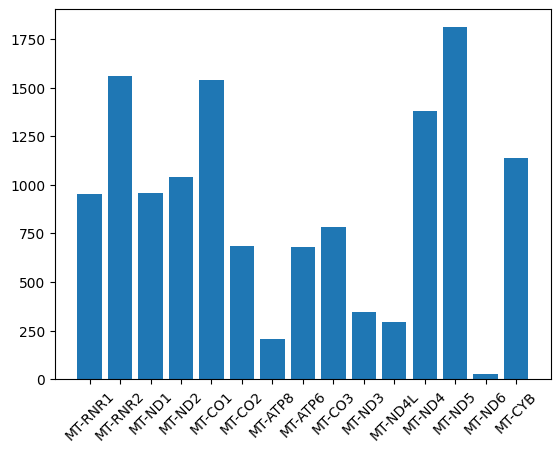

array([0.00096898, 0.00121166, 0.00166893, 0.00320951, 0.002163  ,
       0.00105535, 0.00037538, 0.00559013, 0.00194594, 0.00028929,
       0.00165673, 0.00452444, 0.00126984, 0.02438083, 0.00200841])

In [24]:
length = {
    'MT-ATP8': 8572 - 8366, 
    'MT-ATP6': 9207 - 8527, 
    'MT-CO1': 7445 - 5904, 
    'MT-CO2': 8269 - 7586, 
    'MT-CO3': 9990 - 9207, 
    'MT-CYB': 15887 - 14747, 
    'MT-ND1': 4262 - 3307, 
    'MT-ND2': 5511 - 4470,  
    'MT-ND3': 10404 - 10059, 
    'MT-ND4L': 10766 - 10470, 
    'MT-ND4': 12137 - 10760, 
    'MT-ND5': 14148 - 12337, 
    'MT-ND6': 14173 - 14149, 
    'MT-RNR1': 1601 - 648, 
    'MT-RNR2': 3229 - 1671
}
length_list = np.array([length[n] for n in name])

plt.bar(name, length_list)
plt.xticks(rotation = 45)
plt.show()

ave5[:15] / length_list / ave4[:15]

In [12]:
aves = pd.DataFrame(
    np.transpose(np.array([ave1, ave2, ave3, ave4])), 
    columns = ['D1CD4', 'D1CD8', 'D2CD4', 'D2CD8']
); 
aves['Mean'] = aves[['D1CD4', 'D1CD8', 'D2CD4', 'D2CD8']].mean(axis = 1); 
aves

,D1CD4,D1CD8,D2CD4,D2CD8,Mean
0,0.006236,0.006000,0.007347,0.008886,0.007117
1,0.023121,0.023225,0.025145,0.028599,0.025022
2,0.001954,0.002209,0.002525,0.002871,0.002390
3,0.001158,0.001324,0.000970,0.001297,0.001187
4,0.004976,0.005395,0.003379,0.006376,0.005032
5,0.008477,0.009562,0.005379,0.007650,0.007767
6,0.004809,0.005373,0.003484,0.004513,0.004545
7,0.000531,0.000641,0.000534,0.000890,0.000649
8,0.006661,0.007370,0.004566,0.005670,0.006067
9,0.001396,0.001588,0.002478,0.002746,0.002052


In [13]:
np.array(aves['Mean'][:15])

array([0.00711734, 0.02502242, 0.00238953, 0.00118729, 0.0050315 ,
       0.00776707, 0.00454479, 0.00064914, 0.00606665, 0.00205203,
       0.00331425, 0.00110065, 0.00152889, 0.0003771 , 0.00518692],
      dtype=float32)

In [14]:
def readAll():
    data = np.array([])
    fileIndex = [(), (1, 4), (1, 8), (2, 4), (2, 8)]
    
    for fileNum in range(1, 5):
        fileName = '../Gene Data/Donor%s_CD%s_Genes.csv' % fileIndex[fileNum]
        dataFile = pd.read_csv(
            fileName, 
            usecols = [
                'MT-ND1', 'MT-ND2', 'MT-ND3', 
                'MT-ND4', 'MT-ND4L', 
                'MT-ND5', 'MT-ND6', 
                'MT-CO1', 'MT-CO2', 'MT-CO3', 
                'MT-ATP8', 'MT-ATP6', 
                'MT-CYB', 
                'MT-RNR1', 'MT-RNR2', 'non-MT'
            ]
        ).astype('float32')
        
        if fileNum == 1:
            data = dataFile.to_numpy()
        else:
            data = np.append(data, dataFile.to_numpy(), axis = 0)
    
    for i in range(len(data)):
        data[i] = data[i] / data[i][15]
    name = dataFile.columns.values[:15]
    ave = np.array([np.average(d) for d in data.transpose()])
    cv = np.array([np.std(d) / np.average(d) for d in data.transpose()])
    
    return(name, ave[:15], cv[:15])

In [15]:
def readFile(fileIndex):    
    usecol = [
        'MT-ND1', 'MT-ND2', 'MT-ND3', 
        'MT-ND4', 'MT-ND4L', 
        'MT-ND5', 'MT-ND6', 
        'MT-CO1', 'MT-CO2', 'MT-CO3', 
        'MT-ATP8', 'MT-ATP6', 
        'MT-CYB', 
        'MT-RNR1', 'MT-RNR2', 'non-MT'
    ]
    fileInd = [(), (1, 4), (1, 8), (2, 4), (2, 8)]
    if fileIndex == 0:
        return(readAll())
    elif fileIndex == 5:
        fileName = '../Gene Data/smartseq_mitogenes.csv'
        usecol[15] = 'Non-MT'
    else: 
        fileName = '../Gene Data/Donor%s_CD%s_Genes.csv' % fileInd[fileIndex]
    dataFile = pd.read_csv(fileName, usecols = usecol).astype('float32')

    data = dataFile.to_numpy()
    for i in range(len(data)):
        data[i] = data[i] / data[i][15]
    name = dataFile.columns.values[:15]
    ave = np.array([np.average(d) for d in data.transpose()])
    cv = np.array([np.std(d) / np.average(d) for d in data.transpose()])
    
    return(name, ave[:15], cv[:15])

In [16]:
def TLInitialize(ref):
    # Productions
    p1 = np.zeros(15)
    p1[13] = 1 # ND6
    p2 = np.ones(15)
    p2[13] = 0
    p3 = np.zeros(15)
    p3[0] = 1
    p3[1] = 1
    v = [p1, p2, p3]

    # Degradation
    d = []
    for i in range(15):
        z = np.zeros(15)
        z[i] = -1
        d.append(z)
    v += d
    
    # Coefficients
    coef = 1 / ref
    for i in range(2, 15):
        if i == 13:
            continue
        coef[i] = coef[i] * 0.9
    coef /= 2 / np.average(np.log(2) / coef[2:15] / 60)
    
    c = [20 * 100, 18 * 100, 2 * 100] + list(coef)
    
    return(c, v)

In [17]:
def TauLeaping(t_ini, x_ini, timeLimit, tau, c, v):    
    # Tau-Leaping with L Steps
    t = t_ini
    t_list = np.arange(t, t + timeLimit, tau)
    
    a = np.zeros(18)
    result = []
    x = x_ini
    for i in range(len(t_list)): 
        # Propensity Function
        for j in range(3):
            a[j] = c[j]
        for j in range(3, 18):
            a[j] = c[j] * x[j - 3]
        for j in range(18):
            if a[j] < 0: 
                a[j] = 0
        
        # Number of reactions during each step
        d = np.array([
            np.random.poisson(a[k] * tau, 1)[0] for k in range(18)
        ])
        
        x = x + np.dot(d, v)
        result.append(x)
    
    return(t_list, result)

In [18]:
def TLCompare(results, ref, t_current, name):
    
    data = [np.average(dataCell) for dataCell in np.transpose(results, (1, 2, 0))[t_current - 1]]

    fig = plt.figure()
    bar_width = 0.4

    ax = fig.add_subplot(111)
    ax.set_ylim([0, np.max(data) * 1.1])
    ax.bar(x = np.arange(len(name)), width = bar_width, height = data, label='y1', fc = 'steelblue', alpha = 0.8)

    ax1 = ax.twinx()
    ax1.set_ylim([0, np.max(ref) * 1.1])
    ax1.bar(x = np.arange(len(name)) + bar_width, width = bar_width, height = ref, label='y1', fc = 'indianred', alpha = 0.8)

    plt.xticks(np.arange(len(name)) + bar_width / 2, name) 
    ax.tick_params(axis = 'x', labelrotation = 45)

    plt.show()

In [19]:
def CVCompare(results, ref, t_current, name):
        
    data = [np.std(dataCell) / np.average(dataCell) for dataCell in np.transpose(results, (1, 2, 0))[t_current - 1]]

    fig = plt.figure()
    bar_width = 0.4

    ax = fig.add_subplot(111)
    ax.set_ylim([0, np.max(data) * 1.1])
    ax.bar(x = np.arange(len(name)), width = bar_width, height = data, label='y1', fc = 'steelblue', alpha = 0.8)

    ax1 = ax.twinx()
    ax1.set_ylim([0, np.max(ref) * 1.1])
    ax1.bar(x = np.arange(len(name)) + bar_width, width = bar_width, height = ref, label='y1', fc = 'indianred', alpha = 0.8)

    plt.xticks(np.arange(len(name)) + bar_width / 2, name) 
    ax.tick_params(axis = 'x', labelrotation = 45)

    plt.show()

In [20]:
def TauLeapingSet(iter, fileIndex):
    name, ave, cv = readFile(fileIndex = fileIndex)
    
    t_limit = 100000
    t_current = 0
    t_step = 3000
    x_current = np.zeros((iter, 15))
    diff = np.array([])
    key = 0
    c, v = TLInitialize(ref = ave)

    st = time.time()
    while t_current < t_limit:
        results_temp = []
        for i in range(iter):
            t_list, result = TauLeaping(t_ini = t_current, x_ini = x_current[i], timeLimit = t_step, tau = 1, c = c, v = v)
            x_current[i] = result[t_step - 1]
            results_temp.append(result)
        results_temp = np.array(results_temp)
        
        if t_current == 0:
            results = results_temp
        else: 
            results = np.concatenate((results, results_temp), axis = 1)
        t_current += t_step
        print(t_current, time.time() - st)
        
        key1 = np.average(np.transpose(results, [2, 1, 0])[1][t_current - 1])
        diff = np.append(diff, key1 - key)
        # print(np.average(diff[-5:]), diff[-5:])
        if np.abs(np.average(diff[-5:])) > 100:
            key = key1
        else:
            break
    
    TLCompare(results = results, ref = ave, t_current = t_current, name = name)
    CVCompare(results = results, ref = cv, t_current = t_current, name = name)
    
    return(np.array(results), t_current, name, ave, cv)

In [21]:
def ShowProcess(results, t_current):
    t_list = np.linspace(0, t_current - 1, t_current)
    for i in range(15):
        plt.plot(t_list, [np.average(data) for data in np.transpose(results, (2, 1, 0))[i]])
    plt.show()

3000 15.35535717010498
6000 30.537863969802856
9000 47.2443528175354
12000 64.95211005210876
15000 82.65140557289124
18000 100.34732699394226
21000 117.32828783988953
24000 134.10544514656067
27000 150.88023447990417


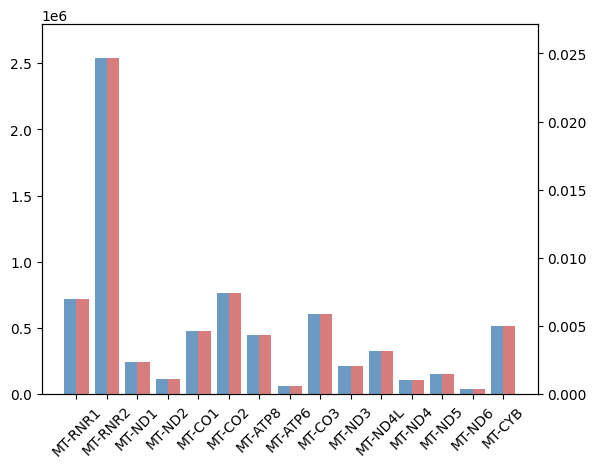

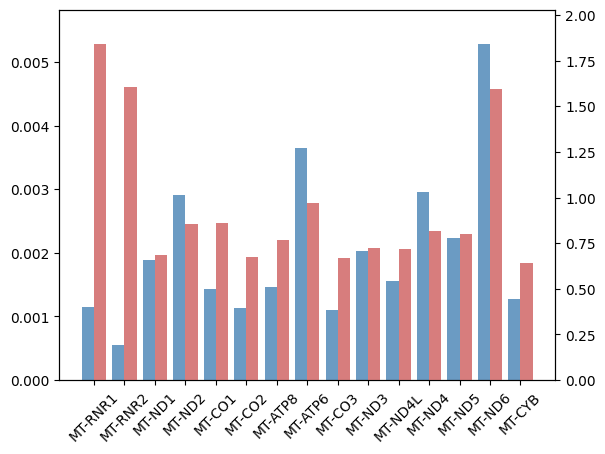

In [22]:
# Average
result_01 = TauLeapingSet(iter = 100, fileIndex = 0)

3000 18.182749032974243
6000 34.82841920852661
9000 51.15469741821289
12000 67.90151381492615
15000 84.52532863616943
18000 101.5023992061615
21000 118.15997099876404
24000 134.37819361686707
27000 153.3399019241333


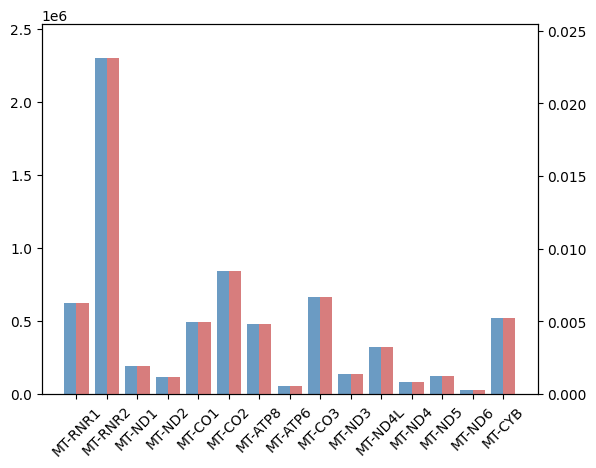

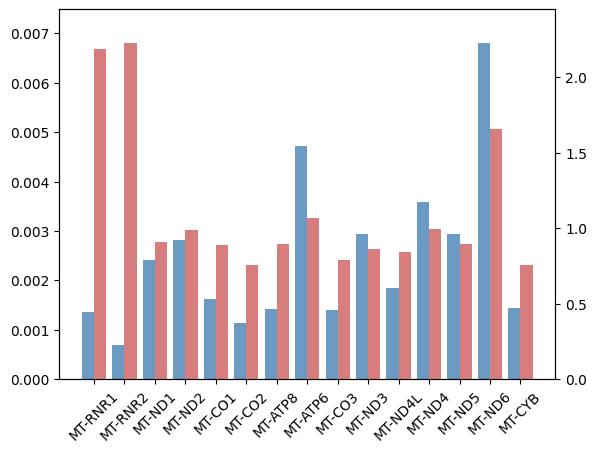

In [23]:
# D1CD4
result_1 = TauLeapingSet(iter = 100, fileIndex = 1)

3000 17.861046314239502
6000 34.805726766586304
9000 51.53288173675537
12000 68.32393026351929
15000 84.98712062835693
18000 101.6528856754303
21000 118.53224086761475
24000 134.69436049461365


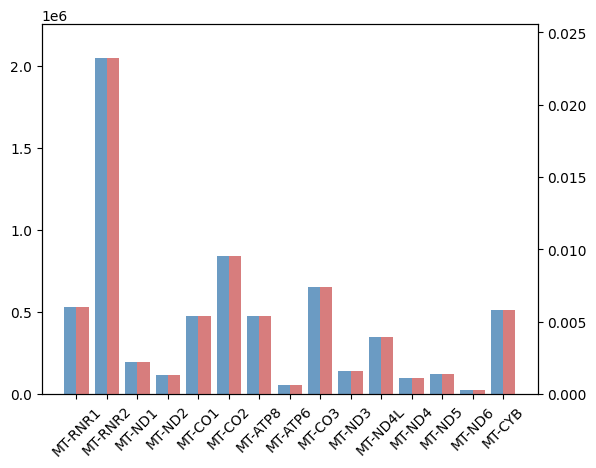

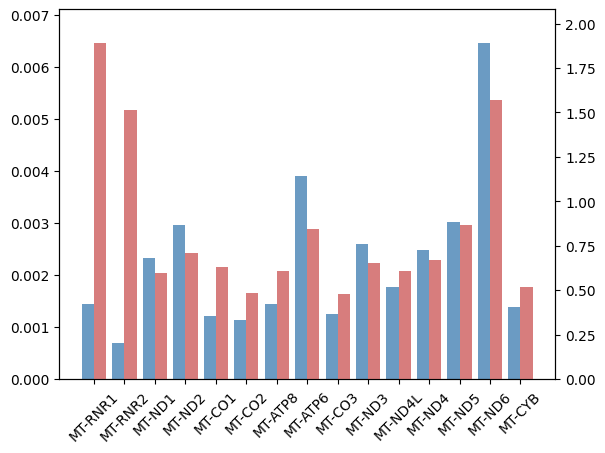

In [24]:
# D1CD8
result_2 = TauLeapingSet(iter = 100, fileIndex = 2)

3000 17.373273611068726
6000 33.25647807121277
9000 49.34633255004883
12000 65.07725882530212
15000 82.10177993774414
18000 98.67409181594849
21000 115.72742891311646
24000 131.90164232254028
27000 148.93972420692444
30000 165.44624137878418


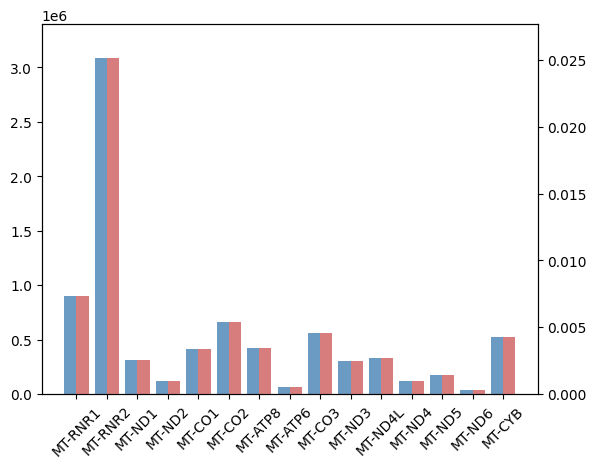

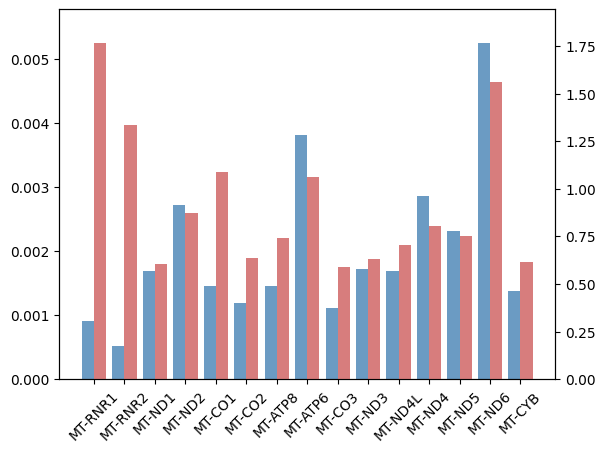

In [25]:
# D2CD4
result_3 = TauLeapingSet(iter = 100, fileIndex = 3)

3000 16.62300705909729
6000 33.2093722820282
9000 49.64208149909973
12000 65.80846500396729
15000 81.75566029548645
18000 98.14956331253052
21000 114.03923463821411
24000 130.66464924812317
27000 147.12129187583923
30000 163.39565348625183


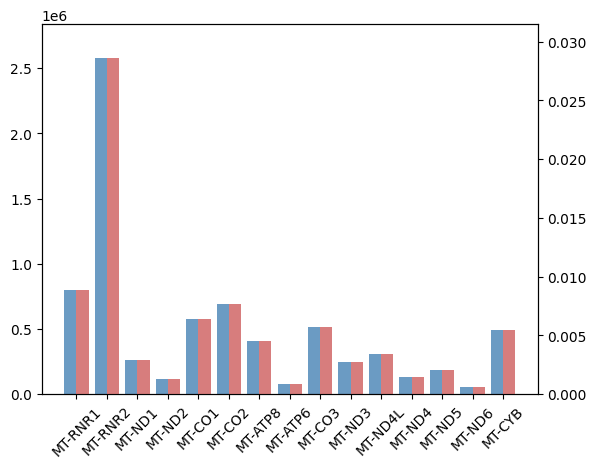

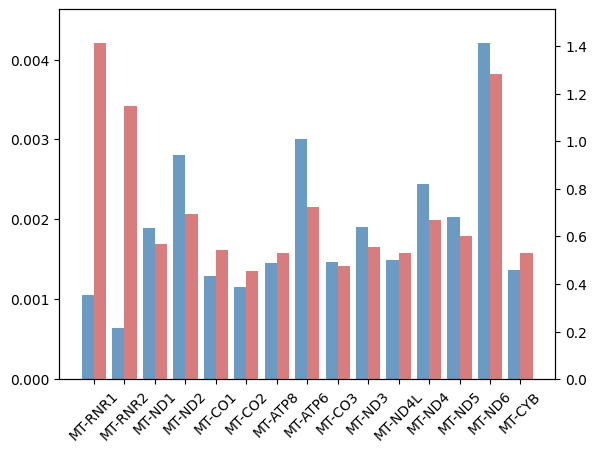

In [26]:
# D2CD8
result_4 = TauLeapingSet(iter = 100, fileIndex = 4)

3000 16.943175792694092
6000 33.156028270721436
9000 49.51044774055481
12000 65.9933340549469
15000 82.88276410102844
18000 99.30068492889404
21000 115.77320647239685
24000 132.04338765144348
27000 148.69663786888123
30000 164.9550895690918


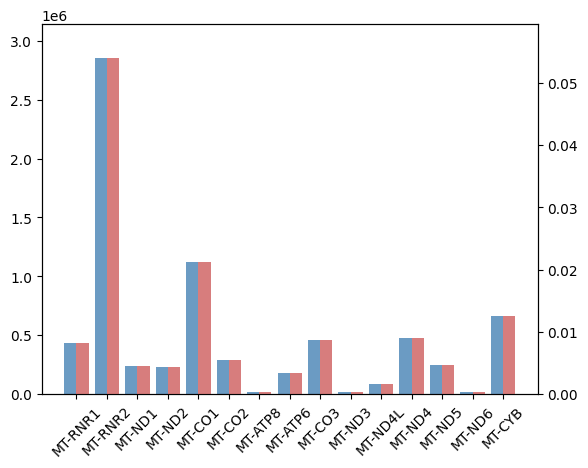

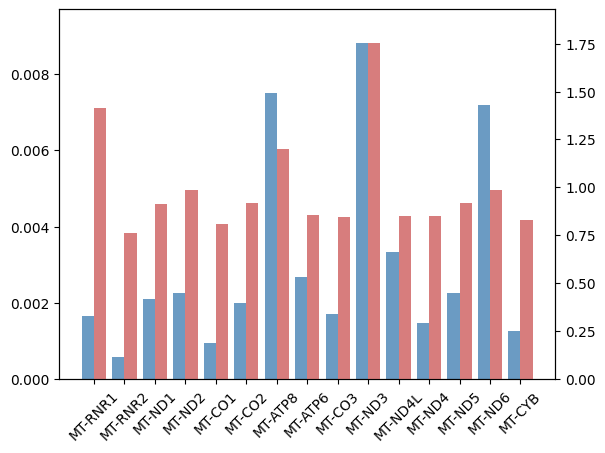

In [27]:
# Smart sc-seq
result_5 = TauLeapingSet(iter = 100, fileIndex = 5)

In [34]:
result_list = [result_01[0], result_1[0], result_2[0], result_3[0], result_4[0]]
aves_ = [ave1[:15], ave2[:15], ave3[:15], ave4[:15], np.array(aves[:15]['Mean']), ave5[:15]]

with open("data.pickle", "wb") as file:
    pickle.dump((result_list, result_5, aves_, ave5, name), file)